# 5.3.2 Simulating Data and Fitting the Model with PyMC3

In [4]:
!conda install -c conda-forge -y -q bambi

Channels:
 - conda-forge
 - defaults
Platform: linux-64


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import bambi as bmb


sns.set(style="darkgrid", palette="muted")

In [36]:
def simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq):
    """
    Simulate a random dataset using a noisy
    linear process.
    N: Number of data points to simulate
    beta_0: Intercept
    beta_1: Slope of univariate predictor, X
    """
    # Create a pandas DataFrame with column ’x’ containing
    # N uniformly sampled values between 0.0 and 1.0
    choices = list(map(lambda x: float(x)/float(N), np.arange(N)))
    
    df = pd.DataFrame({
        "x": np.random.RandomState(42).choice(choices, N, replace=False)
    })
    
    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to
    # generate a column ’y’ of responses based on ’x’
    eps_mean = 0.0
    df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(42).normal(eps_mean, eps_sigma_sq, N)
    
    return df

In [38]:
def glm_mcmc_inference(df, iterations=5000):
    """
    Calculates the Markov Chain Monte Carlo trace of
    a Generalised Linear Model Bayesian linear regression
    model on supplied data.
    df: DataFrame containing the data
    iterations: Number of iterations to carry out MCMC for
    """
    # Use PyMC3 to construct a model context
    model = bmb.Model("y ~ x", df, family="gaussian")
    
    results = model.fit(draws=iterations, cores=4, chains=4, random_seed=1, progressbar=True)
        
    return results

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, x]


Output()

Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 90 seconds.


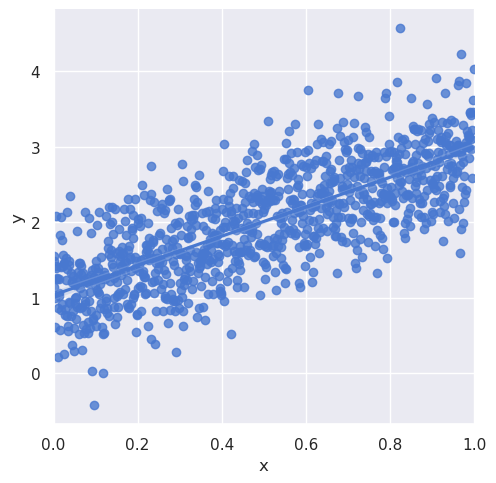

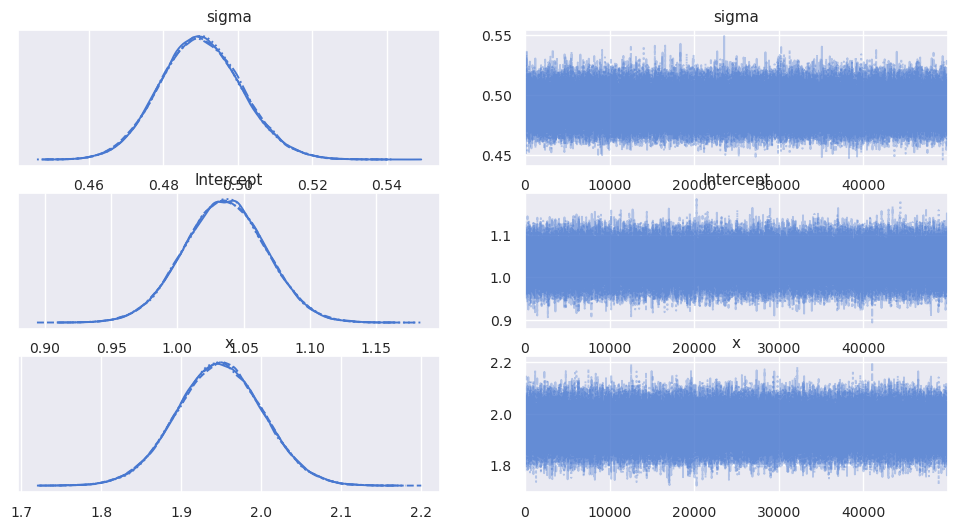

In [40]:
if __name__ == "__main__":
    # These are our "true" parameters
    beta_0 = 1.0 # Intercept
    beta_1 = 2.0 # Slope
    
    # Simulate 100 data points, with a variance of 0.5
    N = 1000
    eps_sigma_sq = 0.5
    
    # Simulate the "linear" data using the above parameters
    df = simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq)
    
    # Plot the data, and a frequentist linear regression fit
    # using the seaborn package
    sns.lmplot(x="x", y="y", data=df) #, size=10)
    plt.xlim(0.0, 1.0)
    
    trace = glm_mcmc_inference(df, iterations=50_000)

    pm.plot_trace(trace)
    plt.show()